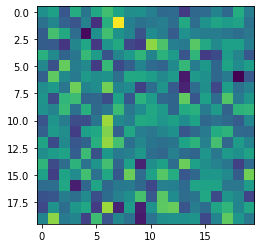

In [3]:
import matplotlib.pyplot as plt
import numpy as np

A = np.random.randn(20,20)

fig, ax = plt.subplots()

gci = ax.imshow(A)




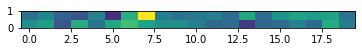

In [12]:
gci.axes.set_ylim(0, 1)
fig

### Welcome to the pyGIMLi tutorial at Transform2021


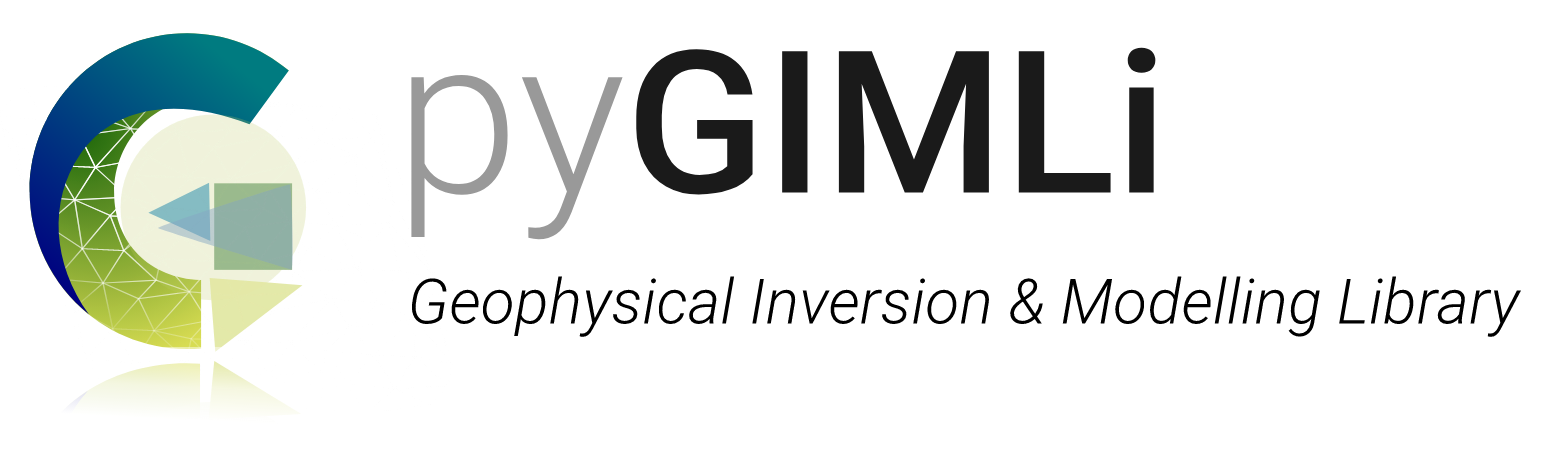

[About pyGIMLi](https://www.pygimli.org/about.html#sec-gimli)

[Further Documentation](https://www.pygimli.org/GIMLi_Documentation.pdf)

#### In this tutorial we will : 

1. Create the out first pyGIMLi world and mesh
2. Solve the heat equation on this mesh

This is notebook 1 out of x covered in this tutorial 



Please review the installation instructions on the README.md before importing the libraries

In [1]:
#%matplotlib widget
%matplotlib inline
%config InlineBackend.figure_format='svg' #setting figure format for this notebook

In [2]:
import pygimli as pg
from pygimli import meshtools as mt
from pygimli.viewer import showMesh # explore docstrings better than pg.show

### Create a world
Here we create a geometry definition of the domain which is a simple rectangle. The inputs are start and end points and you can also set a specific marker. The default marker start is 1. 

In [3]:
world = mt.createWorld(start=[-20, 0], end=[20, -16])
print(world)

Mesh: Nodes: 4 Cells: 0 Boundaries: 4


`pg.show` is a handy tool to show your world and how it is being built

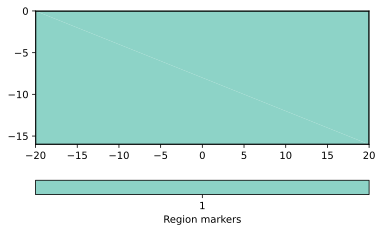

In [7]:
pg.show(world); # actually this is a shortcut to showMesh
#showMesh(world,
       #boundaryMarkers=True
       #);

### Create a polygon

Next we create a polygon to add to our region that is closed and contains three vertices. You can add more nodes to the polygon with "addNodes" and choose how to interpolate between these nodes with "interpolate="

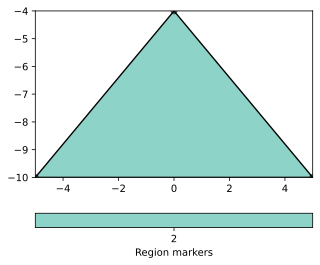

In [10]:
body = mt.createPolygon([[-5, -10],[5, -10], [0, -4]], 
                        isClosed=True, marker=2,
                        #addNodes=4,
                        #interpolate='spline', 
                        )
pg.show(body, showNodes=True);

We add the body to the initial world with a simple sumation. Notice that the markers are automatically assigned. 

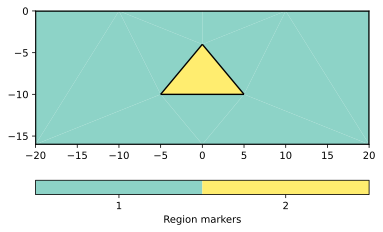

In [11]:
geom = world + body
pg.show(geom, boundaryMarkers=True);

### Create a Mesh 

pyGIMLi has many options to create different meshes. `mt.createMesh` creates mesh using `triangles` a Two-Dimensional quality mesh generator and delaunay triangulator. 

The additional input parameters control the area of these triangles and the smoothness. The quality factor can also be called into `mt.createMesh` which prescribes the minimum angles allowed in the final mesh. This can help optimize the mesh and the numerical accuracy may be improved, however, this can cost alot of computer time. 

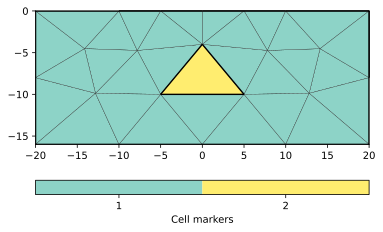

In [19]:
mesh = mt.createMesh(geom, 
                     #area=1.0, 
                     smooth=[0, 4] #[0:no smoothing, 1:node center, 2:weighted node center, # of iter]
                    )
showMesh(mesh, markers=True, showMesh=True);

### Solve 2D Heat equation 
Now we solve the heat equation
$$ \nabla (a \cdot \nabla T) = f $$

`pg.solver.solve` solves a partial differential equation. We apply this to the mesh we created. We assign thermal diffusivities values to the 2 regions
using their marker number (a) and fixed temperatures at the boundaries (bc) using Dirichlet boundary conditions.

In [43]:
T = pg.solver.solve(mesh,
                    a=[[1, 1.0], [2, 20.0]], #[marker,value]
                    bc={'Dirichlet':{-1:1.0, -2:0.0}}, 
                    verbose=True)

Mesh:  Mesh: Nodes: 23 Cells: 30 Boundaries: 52
Assembling time:  0.001
Solving time:  0.0


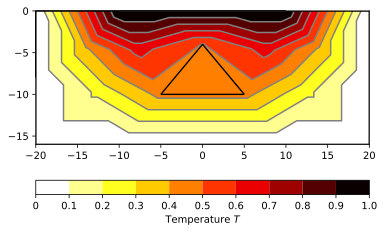

In [50]:
ax, _ = showMesh(mesh, data=T, label='Temperature $T$', cMap="hot_r",
                 nLevs=11, showBoundary=True);